In [15]:
#H0: Giả thiết suy diễn
# alpha: mức sai lần: 10% 5% 1%
# độ tin cậy: 90% 95% 99%

# p-value < alpha: chấp nhận H0
# p-value > alpha: bác bỏ H0
import pandas as pd

In [16]:
df = pd.read_csv('dulieuxettuyendaihoc.csv',
                 header=0,delimiter=',',encoding='utf-8')

In [17]:
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [18]:
df.rename(columns={'NGAYTHI':'NT',
                   'DINHHUONGNGHENGHIEP':'NGHE'}, 
                   inplace=True)
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [19]:
#PhuongPhap 1: One Sample T-Test(Nsample<30): Định lượng
# Ho: ny = x

In [20]:
#Câu 1: kiểm tra xem trung bình điểm thi m1 của thí sinh thi khối C có bằng 4.0
dfKhoiC = df.loc[df['KT'] == 'C']
dfKhoiC['M1']
#Giá trị H0: Điểm trung bình của thi sinh thi khối C của môn thi m1 có bằng 4.0
#Default anpha:5

1     6.00
2     5.00
6     6.50
22    5.00
23    6.75
24    7.00
25    4.75
26    5.25
27    5.25
95    5.25
96    5.25
97    7.00
98    5.00
99    5.25
Name: M1, dtype: float64

In [21]:
dfKhoiC['M1'].describe()

count    14.000000
mean      5.660714
std       0.812209
min       4.750000
25%       5.062500
50%       5.250000
75%       6.375000
max       7.000000
Name: M1, dtype: float64

In [22]:
import scipy.stats as stats

In [23]:
#Với one sample T-test thì giả thiết Ho; muy = 4.0
# Mắc định mức tin cậy là 95% và mức sai lần là 5%
stats.ttest_1samp(dfKhoiC['M1'], popmean=4.0)

#p-value = 3.63x10^-6 < 0.05
#Không đủ dữ kiện kết luận
#Để suy diễn ra trung bình môn của điểm M1 cho nhưng thí sinh thi khối C là 4.0 với mức tin cậy 95%
#Kết luận: Không đủ dữ kiện (dữ liệu) để nói rằng trung bình điểm thi m1 của thí sinh khối C là 4.0 với mức sai lần 5%

TtestResult(statistic=np.float64(7.650519779016341), pvalue=np.float64(3.6339826927369557e-06), df=np.int64(13))

In [24]:
#Sinh viên kiểm tra xem điểm trung bình môn thi M2 của khối thi C có bằng 5.7 hay không
stats.ttest_1samp(dfKhoiC['M2'], popmean=5.7)
# pvalue = 0.014014 < 0.05
# Không đủ điều kiện để nói rằng điểm trung bình môn thi M2 của khối thi C bằng 5.7 với mức sai lầm là 5%

TtestResult(statistic=np.float64(-2.820074837915494), pvalue=np.float64(0.0144629751431775), df=np.int64(13))

In [25]:
#Sinh viên kiểm tra xem điểm trung bình môn thi M2 của khối thi C có bằng 5.0 hay không
stats.ttest_1samp(dfKhoiC['M2'], popmean=5.0)
#Đủ dữ kiện để suy diễn điểm trung bình M2 cho thí sinh thi khối C là 5.0 với mức tin cậy 95%

TtestResult(statistic=np.float64(-1.4752216305397354), pvalue=np.float64(0.16395763655140863), df=np.int64(13))

In [26]:
#PP 2: Two Sample T-Test (Nsample < 30): Định lượng (X,Y)
# H0: X = Y trung bình x bằng y

In [27]:
# Câu 2: Kiểm tra xem trung bình điểm thi của M1 và trung bình điểm của M2 của thí sinh thi khối C có bằng nhau không?
# H0: M1/c = M2/c  alpha = 5%
dfKhoiC = df.loc[df['KT'] == 'C']
stats.ttest_ind(dfKhoiC['M1'], dfKhoiC['M2'], equal_var=True)
#Không đủ dữ kiện để nói rằng trung bình của M1 bằng điểm trung bình của M2 trong khối C ở mức sai lầm là 5%

TtestResult(statistic=np.float64(2.5331368604654054), pvalue=np.float64(0.017676922552296807), df=np.float64(26.0))

In [28]:
# Suy diễn xem trung bình M1 có bằng trung bình M3 cho thí sinh thi khối C với mức tin cậy 95%
dfKhoiC = df.loc[df['KT'] == 'C']
stats.ttest_ind(dfKhoiC['M1'], dfKhoiC['M3'], equal_var=True)

TtestResult(statistic=np.float64(2.6321295849540447), pvalue=np.float64(0.014085909192033959), df=np.float64(26.0))

In [29]:
from statsmodels.stats.weightstats import ztest as ztest


In [ ]:
#ONE SAMPLE Z-TEST: (Nsample >=30)
# HO = Xngang = x
#Dùng để kiểm định trung bình của biến định lượng có bằng một giá trị cho trước với điều kiện số lượng mẫu > 30

In [30]:
#Kiểm tra xem điểm trung bình của M1 có bằng 8 hay không
ztest(df['M1'], value=8.0)
# p-value = 1.58x10^(-196) < 0.05
#Không đủ dữ kiện để nói trung bình của M1 là 8.0 với mức tin cậy 5%

(np.float64(-29.907152266677993), np.float64(1.588509177330612e-196))

In [31]:
#Kiểm tra xem điểm trung bình của M2 có bằng 6.7 hay không
ztest(df['M2'], value=6.7)
# p-value = 1.04x10^(-117) < 0.05
#Không đủ dữ kiện để nói trung bình của M2 là 6.7 với mức tin cậy 5%

(np.float64(-23.06488697108683), np.float64(1.0428701078797563e-117))

In [ ]:
# TWO SAMPLE Z-TEST
# Tưởng tự TWO SAMPLE Z-TEST nhưng số lượng mẫu >= 30
# H0: Xngang=Yngang

In [32]:
# Hãy kiểm tra xem điểm trung bình M1 có bằng M2
ztest(df['M1'], df['M2'], value=0)
# p_value = 0.0037 < 0.05
#Không đủ dữ kiện để chứng minh điểm trung bình M1 bằng M2 với mức tin cậy 95%

(np.float64(-2.9004757923795), np.float64(0.0037259661678783573))

In [33]:
# Hãy kiểm tra xem điểm trung bình M2 có bằng M3
ztest(df['M2'], df['M3'], value=0)
# p_value = 3.009250404643791e-05 < 0.05
#Không đủ dữ kiện để chứng minh điểm trung bình M2 bằng M3 với mức tin cậy 95%

(np.float64(-4.172765180703833), np.float64(3.009250404643791e-05))

In [ ]:
# Tổng kết:
#     One sample T-Test(n<30)
#     One sample Z-Test(n<30)
#     Two sample T-Test(n>=30)
#     Two sample Z-test(n>=30)

In [ ]:
# 5. Suy diễn tương quan: định lượng (X, Y)
# rx,y < 0 : nghich X tăng Y giảm và ngược lại 
# rx,y = 0 : không tương quan
# rx,y > 0 : nghich X tăng Y tăng và tương tự
#rx,y thuộc [-1;1] 

# 0.5 -> 0.65 : TB
# 0.65 -> 0.8 : k
# 0.8 -> 0.95 : T
# 0.95 -> ... : HH

#VD:
#H0: rx,y = 0
# p_value = 0.73 > alpha
#Không đủ điều kiện để nói M1 và M2 là tương quan (Không tương quan)

In [ ]:
# Kiểm định tương quan dùng để kiểm định tương quan của hai biến định lượng
# Ho: r = 0 Không tương quan

In [35]:
from scipy.stats.stats import pearsonr


C:\Users\VanLoc\AppData\Local\Temp\ipykernel_17520\2554227351.py:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [36]:
# Câu 5: Kiểm tra xem M1 và M2 có tương quan không
pearsonr(df['M1'], df['M2'])
# |r| = 0.35 > 0 tương quan thuận nhưng quá nhỏ
# p-value = 0.72 > anpha = 0.05
# M1 và M2 không tương quan
# Đủ dữ kiện để suy diễn M1 và M2 không tương quan chấp nhận Ho. Với mức tin cậy 95%

PearsonRResult(statistic=np.float64(0.03515405725785023), pvalue=np.float64(0.7284198928723625))

In [37]:
# Kiểm tra xem M1 và M3 có tương quan không
pearsonr(df['M1'], df['M3'])
# p_value = 0.8532534347055037 > alpha
#Không đủ điều kiện để nói M1 và M2 là tương quan (Không tương quan)

PearsonRResult(statistic=np.float64(0.018730760164383135), pvalue=np.float64(0.8532534347055037))

In [38]:
# Kiểm tra xem M2 và M3 có tương quan không
pearsonr(df['M2'], df['M3'])
#p_value = 0.3651344767496172 > alpha
#Không đủ điều kiện để nói M2 và M3 là tương quan (Không tương quan)

PearsonRResult(statistic=np.float64(-0.09152288755408225), pvalue=np.float64(0.3651344767496172))

In [ ]:
#6. Suy diễn FISHES: 2 biến định tính
# Kiểm tra sự độc lập của 2 biến ĐỊNH TÍNH mà ở đó giá trị thể hiện ở dạng nhị phân dạng nhị phân 2x2
# Chủ yếu các phương pháp kiểm tra định tính sẽ được suy diễn từ bảng cross tab
# Ho: 2 biến độc lập
# Count là hàm dùng cho biến định tính

In [39]:
import scipy.stats as stats

In [42]:
# Hãy kiểm tra xem có sự phụ thuộc nào giữa việc sinh viên có định hướng nghề nghiệp và giới tính khi thí sinh đăng ký dự thi không
# Fishen Ho: Giới tính và Nghe là độc lập
crosdata = pd.crosstab(df['GT'], [df['NGHE']], rownames=['GT'], colnames=['NGHE'])
crosdata
# Có 25 sinh viên nữ được định hướng nghề nghiệp
# Có 23 sinh viên nữ không được định hướng nghề nghiệp
# Có 32 sinh viên nam không được định hướng nghề nghiệp
# Có 20 sinh viên nam được định hướng nghề nghiệp


NGHE,No,Yes
GT,,
F,23,25
M,32,20


In [44]:
odd_ratio, p_value = stats.fisher_exact(crosdata)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))
# pvalue: 0.22763927303454412 > 0.05
# Chấp nhận Ho: Đủ điều kiện để nói rằng việc hướng nghiệp là độc lập so với giới tính
# Chấp nhận Ho: Không đủ điều kiện để nói rằng giới tính phụ thuộc vào hướng nghiệp
# Việc khi tuyển sinh thì giới ảnh hưởng đến việc lựa chọn nghề nghiệp

odd ratio is : 0.575
p_value is : 0.22763927303454412


In [47]:
#7. Kiểm định Chi-Square TEST
# Mục đích: Kiểm tra sự độc lập của 2 biến định tính nhưng tổng quát hơn dành cho dữ liệu nhìu giá trị, và giá trị thể hiện không phải là nhị phân
# Ho: 2 biến độc lập

In [45]:
from scipy.stats import chi2_contingency


In [46]:
# Hãy kiểm tra xem có sự phụ thuộc nào giữa khối thi và khu vực đăng ký dự thi không
crosdata = pd.crosstab(df['KV'], [df['KT']], rownames=['KV'], colnames=['KT'])
crosdata

KT,A,A1,B,C,D1
KV,,,,,
1,29,2,8,8,13
2,9,0,0,2,8
2NT,11,4,1,4,1


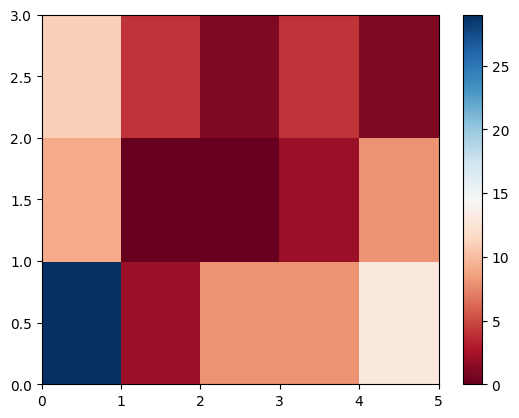

In [49]:
import matplotlib.pyplot as plt
plt.pcolor(crosdata,cmap='RdBu')
plt.colorbar()
plt.show()


In [50]:
stat, p, dof, expected = chi2_contingency(crosdata)

In [51]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
#pvalue = 0.02 < 0.05 
# Không đủ dữ liệu để nói KT và KV là phụ thuộc
# Đủ dữ kiện để nói KT và KV là độc lập

p value is 0.02012461887796485
Dependent (reject H0)


In [54]:
# GT và KT có mối quan hệ hay khôngkhông
crosdata = pd.crosstab(df['GT'], [df['KT']], rownames=['GT'], colnames=['KT'])
crosdata

KT,A,A1,B,C,D1
GT,,,,,
F,15,5,4,8,16
M,34,1,5,6,6


In [55]:
stat, p, dof, expected = chi2_contingency(crosdata)

In [56]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
#pvalue = 0.005 < 0.05 
# Khối thi phụ thuộc vào giới tính
# Đủ điều kiện để nói KT và GT là phụ thuộc

p value is 0.005044752209452435
Dependent (reject H0)


In [ ]:
#8. ONE WAY ANOVA: biến định lương và định tính
# Dùng để kiểm tra trung bình định lượng trên từng nhóm định tính có bằng nhau hay không
# H0: trung bình của Xn1 = trung bình Xn2 ... = trung bình Xnm

In [70]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [58]:
# Điểm M1 có phụ thuộc vào giới tính không
# H0: trung bình của X1/F = trung bình X1/M 
model = ols('M1 ~ GT', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

# pvalue = 0.444059 > 0.05
# Trung bình điểm của M1 trên giới tính nam bằng trung bình điểm M1 trên giới tính nữ
# Điểm M1 không phụ thuộc vào giới tính


,df,sum_sq,mean_sq,F,PR(>F)
GT,1.0,1.203141,1.203141,0.590538,0.444059
Residual,98.0,199.661859,2.037366,NaN,NaN


In [59]:
# Điểm M2 có phụ thuộc vào KV hay không
model = ols('M2 ~ KV', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

# pvalue = 0.066299 > 0.05
# M2 không phụ thuộc vào KV

,df,sum_sq,mean_sq,F,PR(>F)
KV,2.0,6.053398,3.026699,2.790934,0.066299
Residual,97.0,105.194102,1.084475,NaN,NaN


In [60]:
# Điểm M3 có phụ thuộc vào KT không
model = ols('M3 ~ KT', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

# pvalue = 0.46041 > 0.05
# M3 không phụ thuộc vào khối thi

,df,sum_sq,mean_sq,F,PR(>F)
KT,4.0,3.967636,0.991909,0.911814,0.46041
Residual,95.0,103.344864,1.087841,NaN,NaN


In [ ]:
#9. TWO WAY ANOVA:


In [61]:
# Hãy cho biết điểm M1 có phụ thuộc vào loại GT trên từng nhóm KV hay không
model = ols('M1 ~ GT + KV + GT:KV',data=df).fit()
result = sm.stats.anova_lm(model, type=2)
print(result)

# xem giá trị pr(>F)
# Độc lập trên từng GT với từng nhóm KV với M1

            df      sum_sq   mean_sq         F    PR(>F)
GT         1.0    1.203141  1.203141  0.598960  0.440917
KV         2.0    3.493206  1.746603  0.869512  0.422500
GT:KV      2.0    7.349290  3.674645  1.829350  0.166186
Residual  94.0  188.819363  2.008717       NaN       NaN


In [63]:
# Hãy cho biết điểm M2 có phụ thuộc vào loại KV trên từng nhóm KT hay không
model = ols('M2 ~ KV + KT + KV:KT',data=df).fit()
result = sm.stats.anova_lm(model, type=2)
print(result)
# ĐỘC LẬP
# PHỤ THUỘC
# ĐỘC LẬP

            df     sum_sq   mean_sq         F    PR(>F)
KV         2.0   6.053398  3.026699  2.987203  0.055626
KT         4.0  10.061984  2.515496  2.482671  0.049539
KV:KT      8.0   8.688324  1.086040  1.071869  0.390293
Residual  87.0  88.150282  1.013222       NaN       NaN


In [64]:
# Hãy cho biết điểm M2 có phụ thuộc vào nhóm KV trên từng loại KT hay không
model = ols('M2 ~ KT + KV + KT:KV',data=df).fit()
result = sm.stats.anova_lm(model, type=2)
print(result)
# M2 ĐỘC LẬP KT
# M2 PHỤ THUỘC KV
# M2 ĐỘC LẬP VỚI KV TRÊN TỪNG LOẠI KT

            df     sum_sq   mean_sq         F    PR(>F)
KT         4.0   7.442679  1.860670  1.836390  0.129079
KV         2.0   8.672703  4.336351  4.279766  0.016872
KT:KV      8.0   7.087667  0.885958  0.874397  0.541329
Residual  87.0  88.150282  1.013222       NaN       NaN


In [ ]:
#10. Hồi quy tuyến tính
# Phân tích ảnh hưởng của một, hay nhiều biến định lượng đến một biến định lượng mục tiêu
# M3 <- M1: M1 ảnh hưởng M3 ntn

# M3: Phụ thuộc mục tiêu
# M1: Biến độc lập



In [66]:
import statsmodels.api as sm
# Hãy cho biết điểm M1 có ảnh hướng tới M3 hay không
# f: M1 -> M3
# M3 = f(M1)
# = A1 * M1 + A0
# A1: Cofficient (Hệ số cho biến M1)
# A0: Intenception (Hệ số tự do)


# adding a constant
X_with_constant = sm.add_constant(df[["M1"]].values)

y = df[['M3']].values

result = sm.OLS(y, X_with_constant).fit()

print(result.summary())

# Adj. R-squared gần bằng 0 hoặc bé hơn 0 
# --> Giải thích biến độc lập M1 tác động bao nhiêu phần trăm cho biến phụ thuộc M3
# M1 giải thích sự tác động 0% cho M3

# Prob (F-statistic) giá trị này nhỏ hơn 0.05 suy ra mô hình không có ý nghĩa

# Vị trí 0.000 là khi dùng M1 để giải thích M3 theo hàm hồi quy tuyến tính giải thích 0% và mô hình không có ý nghĩa (khi nào lớn hơn 0.005 thì mới có ý nghĩa)
# Vị trí 0.853 > 5% chứng tỏ mô hình không có ý nghĩa gì (khi nào nhỏ hơn 0.05 thì mới có ý nghĩa)

# Vị trí 4.8238 là A0
# Vị trí 0.0137 là A1

# Vị trí 0.853 > 0.05 M1 không có vai trò trong việc xây dựng mô hình hồi quy tuyến tính nhằm giải thích cho M3

# M3 = 4.8238 + 0.0137 * M1


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.03439
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.853
Time:                        19:55:30   Log-Likelihood:                -145.41
No. Observations:                 100   AIC:                             294.8
Df Residuals:                      98   BIC:                             300.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8238      0.295     16.338      0.0

In [69]:
# Giải sử thí sinh có điểm M1 - 6.7 thì hãy dự báo điểm M3 sẽ là bao nhiêu
M3 = 4.8238 + 0.0137 * 6.7
print('Điểm M3 =',M3)

Điểm M3 = 4.91559


In [70]:
X_with_constant = sm.add_constant(df[["M2"]].values)

y = df[['M3']].values

result = sm.OLS(y, X_with_constant).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8278
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.365
Time:                        20:05:30   Log-Likelihood:                -145.00
No. Observations:                 100   AIC:                             294.0
Df Residuals:                      98   BIC:                             299.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2575      0.433     12.139      0.0

In [71]:
M3 = 5.2575 - 0.0899 * 5.7
M3

4.74507

In [ ]:
# M3 <- M1, M2
# M3 = f(M1, M2)
# M3 = A0 + A1 * M1 + A2 * M2

In [74]:
import statsmodels.api as sm
X_with_constant = sm.add_constant(df[["M1","M2"]].values)
y = df[['M3']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())

#Vị trí 0.009 có 0.9% Giá trị ảnh hưởng tới mô hình hồi quy tuyến tính
#Vị trí 0.649 > 0.05 Không có ý nghĩa
# Vị trí 5.2006 A0
# Vị trí 0.0161 A1
# Vị trí -0.0906 A2
# Vị trí 0.828 > 0.05 M1 tham vào vào chương trình không có ý nghĩa
# Vị trí 0.364 > 0.05 M2 tham gia vào chương trình không có ý nghĩa

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.4335
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.649
Time:                        20:13:35   Log-Likelihood:                -144.98
No. Observations:                 100   AIC:                             296.0
Df Residuals:                      97   BIC:                             303.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2006      0.508     10.241      0.0

In [73]:
M3 = 5.2006 + 0.0161 * 6.0 -0.0906*5.5
M3

4.798899999999999

In [76]:
# Cho biết mức độ tác động của M1 M2 với M3
X = df[["M1","M2"]].values
y = df[['M3']].values
result = sm.OLS(y, X).fit()
print(result.summary())


# Dùng tri tuyệt đối trước khi so sánh
# Vị trí 0.4062 mức độ tác động của M1 tới M3
# Vị trí 0.7367 mức độ tác động của M2 tới M3
# Kết luận là M2 tác động tới M3 hơn M1

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              500.8
Date:                Mon, 09 Sep 2024   Prob (F-statistic):                    3.54e-52
Time:                        20:14:14   Log-Likelihood:                         -181.63
No. Observations:                 100   AIC:                                      367.3
Df Residuals:                      98   BIC:                                      372.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------